In [51]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from scipy import stats
from itertools import combinations

In [52]:
amer_data = pd.read_csv(r'eng.csv')

In [53]:
survey = amer_data.loc[:, amer_data.columns.notnull()]

In [54]:
i = 0
for column in survey.columns:
    if(i != 0):
        col_name = str(column)
        num = re.findall(r'\d+', str(col_name))[0]
        if(int(num)<=9):
            survey.rename(columns = {col_name:f'demographic_{column}'}, inplace = True)
        if((int(num)>=10) and (int(num)<=17)):
            survey.rename(columns = {col_name:f'dbnh_{column}'}, inplace = True)
        if((int(num)>=18) and (int(num)<=26)):
            survey.rename(columns = {col_name:f'dbh_{column}'}, inplace = True)
        if((int(num)>=27) and (int(num)<=38)):
            survey.rename(columns = {col_name:f'dbg_{column}'}, inplace = True)
        if((int(num)>=39) and (int(num)<=45)):
            survey.rename(columns = {col_name:f'ait_{column}'}, inplace = True)
        if((int(num)>=46) and (int(num)<=51)):
            survey.rename(columns = {col_name:f'ainh_{column}'}, inplace = True)
        if((int(num)>=52) and (int(num)<=57)):
            survey.rename(columns = {col_name:f'aih_{column}'}, inplace = True)
    i = i+1
print(survey.columns)

Index(['Timestamp', 'demographic_1. What country do you currently reside in?',
       'demographic_2. What country have you driven the most in?',
       'demographic_3. What is your age?',
       'demographic_4. What is your gender?',
       'demographic_5. What is your ethnicity origin/race?',
       'demographic_6. What is your education?',
       'demographic_7. What is your employment status?',
       'demographic_8. What is your income range?',
       'demographic_9. What is your marital status',
       'dbnh_10. Which best describes your driving behavior most of the time in terms of speed while driving on: NON-HIGHWAY ROADS ',
       'dbnh_11. Which best describes your behavior most of the time when it comes to signaling lane changes while driving on: NON-HIGHWAY ROADS ',
       'dbnh_12. Which best describes your lane changing behavior when driving on: NON-HIGHWAY ROADS',
       'dbnh_13. If you want to change lanes on a NON-HIGHWAY road and move to a lane that is 2 or more lane

In [55]:
for column in survey.columns:
        if(str.startswith(column, 'dbnh')):
            print(f'\'{column}\',')

'dbnh_10. Which best describes your driving behavior most of the time in terms of speed while driving on: NON-HIGHWAY ROADS ',
'dbnh_11. Which best describes your behavior most of the time when it comes to signaling lane changes while driving on: NON-HIGHWAY ROADS ',
'dbnh_12. Which best describes your lane changing behavior when driving on: NON-HIGHWAY ROADS',
'dbnh_13. If you want to change lanes on a NON-HIGHWAY road and move to a lane that is 2 or more lanes away',
'dbnh_14. How would you describe the way you accelerate and decelerate while driving on: NON-HIGHWAY ROADS',
'dbnh_15. How often do you pass other vehicles when driving on: NON-HIGHWAY ROADS',
'dbnh_16. What distance do you usually keep from the car in front of you, when driving on: NON-HIGHWAY ROADS ',
'dbnh_17. Which best describes your braking behavior when driving on: NON-HIGHWAY ROADS',


In [56]:
dbnh_values = survey[['dbnh_10. Which best describes your driving behavior most of the time in terms of speed while driving on: NON-HIGHWAY ROADS ',
'dbnh_11. Which best describes your behavior most of the time when it comes to signaling lane changes while driving on: NON-HIGHWAY ROADS ',
'dbnh_12. Which best describes your lane changing behavior when driving on: NON-HIGHWAY ROADS',
'dbnh_13. If you want to change lanes on a NON-HIGHWAY road and move to a lane that is 2 or more lanes away',
'dbnh_14. How would you describe the way you accelerate and decelerate while driving on: NON-HIGHWAY ROADS',
'dbnh_15. How often do you pass other vehicles when driving on: NON-HIGHWAY ROADS',
'dbnh_16. What distance do you usually keep from the car in front of you, when driving on: NON-HIGHWAY ROADS ',
'dbnh_17. Which best describes your braking behavior when driving on: NON-HIGHWAY ROADS']]

In [57]:
dbnh_values.iloc[:,0].unique()
dbnh_0_key = { 'I typically drive under the speed limit (more than 5 mph UNDER the speed limit).': 0,
               'I typically drive over the speed limit (more than 5 mph OVER the speed limit).': 1,
               'I typically drive the speed limit (within plus or minus 5 mph).': .5
}
dbnh_values.iloc[:,0].replace(dbnh_0_key, inplace = True)

In [58]:
dbnh_values.iloc[:,1].unique()
dbnh_1_key = { 'I signal EVERY move (You use your signal 100% of the time)': 0,
                'I sometimes signal a move: (You use your signal 50% of the time)': .75,
                'I signal my moves often (You use your signal 75% of the time)': .25,
                'I rarely signal a move: (You use your signal 25% of the time or less)':1
}
dbnh_values.iloc[:,1].replace(dbnh_1_key, inplace = True)

In [59]:
dbnh_values.iloc[:,2].unique()
dbnh_2_key = { 'I change lanes only if I have to.': 0,
                'I occasionally change lanes to overtake an extremely slow vehicle.': .5,
                'I change lanes frequently to be in the fastest possible lane.': 1
}
dbnh_values.iloc[:,2].replace(dbnh_2_key, inplace = True)

In [60]:
dbnh_3_key = { 'You plan ahead and change lanes one lane at a time as you see an opening. You rarely change multiple lanes at once.': 0,
                'Sometimes you change multiple lanes at once and sometimes you plan ahead and change lanes one lane at a time.': .5,
                'You frequently change all lanes at once. (This could mean changing 2 or more lanes at once)': 1
}
dbnh_values.iloc[:,3].replace(dbnh_3_key, inplace = True)

In [61]:
dbnh_4_key = {'You typically accelerate and decelerate slowly and it takes you a while to get up to speed. You avoid having to make a short stop.': 0,
            'You typically accelerate and decelerate at a moderate pace and get up to speed relatively quickly. You rarely stop short and passengers do not feel jolted forward or backward when you drive.':.5,
            'You typically accelerate and decelerate very quickly and get up to speed rapidly, but you may feel jolted forward or back frequently while driving.':1
}
dbnh_values.iloc[:,4].replace(dbnh_4_key, inplace = True)

In [62]:
dbnh_5_key = {'Rarely (I only pass vehicles when I absolutely have to)':0,
            'Sometimes (I pass other vehicles in only a few situations)':.25,
            'Often (I pass other vehicles in a variety of different situations)':.75,
            'Always (No matter the situation, I am passing vehicles whenever I get the chance)':1
}
dbnh_values.iloc[:,5].replace(dbnh_5_key, inplace = True)

In [63]:
dbnh_6_key = {'Long Distance':0,
            'Medium Distance':.5,
            'Short Distance':1
}
dbnh_values.iloc[:,6].replace(dbnh_6_key, inplace = True)

In [64]:
dbnh_7_key = {'Sometimes: I brake when necessary, but I try to keep the right distance from the cars around me so that I don’t brake every time the traffic slows.': .5,
            'Rarely: I only brake if I have to, for example when there is traffic or there are emergency vehicles. If can avoid braking by changing lanes I will change lanes.': 0,
            'Frequently : Every time I see brake lights, something in the road, or anytime I perceive risk I brake.':1    
}
dbnh_values.iloc[:,7].replace(dbnh_7_key, inplace = True)

In [65]:
for column in survey.columns:
        if(str.startswith(column, 'dbh')):
            print(f'\'{column}\',')

'dbh_18. Which best describes your driving behavior most of the time in terms of speed while driving on: THE HIGHWAY',
'dbh_19. Which best describes your behavior most of the time when it comes to signaling lane changes while driving on: THE HIGHWAY',
'dbh_20. Which best describes your lane changing behavior when driving on: THE HIGHWAY ',
'dbh_21. If you want to change lanes on the HIGHWAY and move to a lane that is 2 or more lanes away',
'dbh_22. How would you describe the way you accelerate and decelerate while driving on: THE HIGHWAY',
'dbh_23. How often do you pass other vehicles when driving on: THE HIGHWAY',
'dbh_24. What distance do you usually keep from the car in front of you, when driving on: THE HIGHWAY',
'dbh_25. Which best describes your braking behavior when driving on: THE HIGHWAY',
'dbh_26. When driving on a HIGHWAY with more than 2 lanes, what lane is your preference? ',


In [66]:
dbh_values = survey[['dbh_18. Which best describes your driving behavior most of the time in terms of speed while driving on: THE HIGHWAY',
'dbh_19. Which best describes your behavior most of the time when it comes to signaling lane changes while driving on: THE HIGHWAY',
'dbh_20. Which best describes your lane changing behavior when driving on: THE HIGHWAY ',
'dbh_21. If you want to change lanes on the HIGHWAY and move to a lane that is 2 or more lanes away',
'dbh_22. How would you describe the way you accelerate and decelerate while driving on: THE HIGHWAY',
'dbh_23. How often do you pass other vehicles when driving on: THE HIGHWAY',
'dbh_24. What distance do you usually keep from the car in front of you, when driving on: THE HIGHWAY',
'dbh_25. Which best describes your braking behavior when driving on: THE HIGHWAY',
'dbh_26. When driving on a HIGHWAY with more than 2 lanes, what lane is your preference? ']]

In [67]:
dbnh_key = {'I typically drive under the speed limit (more than 5 mph UNDER the speed limit).': 0,
            'I typically drive the speed limit (within plus or minus 5 mph).':.5,
            'I typically drive over the speed limit (more than 5 mph OVER the speed limit).':1
}
dbh_values.iloc[:,0].replace(dbnh_key, inplace = True)

In [68]:
dbnh_key = {'I signal EVERY move (You use your signal 100% of the time)':0,
            'I signal my moves often (You use your signal 75% of the time)':.25,
            'I sometimes signal a move: (You use your signal 50% of the time)':.75,
            'I rarely signal a move: (You use your signal 25% of the time or less)':1
}
dbh_values.iloc[:,1].replace(dbnh_key, inplace = True)

In [69]:
dbnh_key = {'I change lanes only if I have to.':0,
            'I occasionally change lanes to overtake an extremely slow vehicle.':.5,
            'I change lanes frequently to be in the fastest possible lane.':1
}
dbh_values.iloc[:,2].replace(dbnh_key, inplace = True)

In [70]:
dbnh_key = {'You plan ahead and change lanes one lane at a time as you see an opening. You rarely change multiple lanes at once.': 0,
            'Sometimes you change multiple lanes at once and sometimes you plan ahead and change lanes one lane at a time.':.5,
            'You frequently change all lanes at once. (This could mean changing 2 or more lanes at once)':1
    
}
dbh_values.iloc[:,3].replace(dbnh_key, inplace = True)


In [71]:
dbnh_key = {'You typically accelerate and decelerate slowly and it takes you a while to get up to speed. You avoid having to make short stops.': 0,
            'You typically accelerate and decelerate at a moderate pace and get up to speed relatively quickly. You rarely stop short and passengers do not feel jolted forward or backward when you drive.':.5,
            'You typically accelerate and decelerate very quickly and get up to speed rapidly, but you may feel jolted forward or back frequently while driving.':1
}
dbh_values.iloc[:,4].replace(dbnh_key, inplace = True)


In [72]:
dbnh_key = {'Rarely (I only pass vehicles when I absolutely have to)':0,
            'Sometimes (I pass other vehicles in only a few situations)':.25,
            'Often (I pass other vehicles in a variety of different situations)':.75,
            'Always (No matter the situation, I am passing vehicles whenever I get the chance)':1
}
dbh_values.iloc[:,5].replace(dbnh_key, inplace = True)


In [73]:
dbnh_key = {'Long Distance':0,
            'Medium Distance':.5,
            'Short Distance':1
}
dbh_values.iloc[:,6].replace(dbnh_key, inplace = True)

In [74]:
dbnh_key = {'Rarely: I only brake if I have to, for example when there is traffic or there are emergency vehicles. If can avoid braking by changing lanes I will change lanes.':0,
            'Sometimes: I brake when necessary, but I try to keep the right distance from the cars around me so that I don’t brake every time the traffic slows.':.5,
            'Frequently : Every time I see brake lights, something in the road, or anytime I perceive risk I brake.':1
}
dbh_values.iloc[:,7].replace(dbnh_key, inplace = True)

In [75]:
dbnh_key = {'Right lane':0,
            'Middle lanes':.5,
            'Left lane (fast lane)':1
}
dbh_values.iloc[:,8].replace(dbnh_key, inplace = True)

In [76]:
pg.cronbach_alpha(data=dbnh_values,ci=.85)

(0.09830531986220617, array([-0.204,  0.356]))

In [77]:
pg.cronbach_alpha(data=dbnh_values,ci=.95)

(0.09830531986220617, array([-0.336,  0.432]))

In [78]:
for column in survey.columns:
        if(str.startswith(column, 'dbg')):
            print(f'\'{column}\',')

'dbg_27. You need to change your lane to get to the highway, but the spot you were looking to move to is not large enough. What do you do?',
'dbg_28. What best describes your driving behavior when making a turn? ',
'dbg_29. What best describes your driving behavior when driving on a winding road? ',
'dbg_30. Which type of parking do you find the most challenging? ',
'dbg_31. What less than perfect weather situation do you drive in most often? ',
'dbg_32. When driving in that less than perfect weather condition, what happens to your speed?',
'dbg_33. When driving in that less than perfect weather condition, what happens to your signaling behavior? ',
'dbg_34. How would you describe your lane changing behavior when driving in that less than perfect weather condition? ',
'dbg_35. When driving in that less than perfect weather condition, what distance do you prefer to keep from the car in front of you?',
'dbg_36. Which best describes your driving behavior most of the time in terms of speed

In [79]:
dbg_values = survey[['dbg_27. You need to change your lane to get to the highway, but the spot you were looking to move to is not large enough. What do you do?',
'dbg_28. What best describes your driving behavior when making a turn? ',
'dbg_29. What best describes your driving behavior when driving on a winding road? ',
'dbg_30. Which type of parking do you find the most challenging? ',
'dbg_31. What less than perfect weather situation do you drive in most often? ',
'dbg_32. When driving in that less than perfect weather condition, what happens to your speed?',
'dbg_33. When driving in that less than perfect weather condition, what happens to your signaling behavior? ',
'dbg_34. How would you describe your lane changing behavior when driving in that less than perfect weather condition? ',
'dbg_35. When driving in that less than perfect weather condition, what distance do you prefer to keep from the car in front of you?',
'dbg_36. Which best describes your driving behavior most of the time in terms of speed while driving at night? ',
'dbg_37. Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night: ',
'dbg_38. Which best describes your lane changing behavior when driving at night? ']]

In [80]:
dbg_key = {'Slow down and try to find another spot behind.':0,
            'Maintain your speed eventually something will open up. I make plans in advance when I know my exit is near so I have plenty of time to make the lane change.':.5,
            'Speed up and try to find another spot ahead.':1,
            'I am not sure':0
}
dbg_values.iloc[:,0].replace(dbg_key, inplace = True)

In [81]:
dbg_key = {'I brake to slow the vehicle down before turning, and since my speed is slow enough I do not need to brake while making the turn or if I do it is very little.':0,
            'I maintain my current speed and I press the brake while making the turn.':.25,
            'I usually speed up and then make the turn and I usually have to brake while making the turn.':.75,
            'I usually drive at a moderate to fast speed and I don’t brake while making the turn unless I have to.':1
}
dbg_values.iloc[:,1].replace(dbg_key, inplace = True)

In [82]:
dbg_key = {'I tend to reduce my speed, so that I will not have to constantly press the brake when driving around curves in the road.':0,
            'I maintain my speed and if I need to slow down for a curve in the road I will.':.5,
            'I maintain my speed and I don’t slow down for a curve in the road. Passengers may feel jolted sideways.':1
}
dbg_values.iloc[:,2].replace(dbg_key, inplace = True)

In [83]:
dbg_key = {'Angled parking':0,
            'Perpendicular parking':0,
            'Parallel parking':0,
           'Parking on an incline':0
}
dbg_values.iloc[:,3].replace(dbg_key, inplace = True)

In [84]:
dbg_key = {'Rain':0,
            'Snow':0,
            'Ice':0,
           'Fog':0
}
dbg_values.iloc[:,4].replace(dbg_key, inplace = True)

In [85]:
dbg_key = {'I will decrease my speed until the weather condition is gone.':0,
            'Overall, I will decrease my speed, but there may be moments when I speed up temporally.':.5,
            'I go as fast as I normally go as long as the traffic allows.':1,
}
dbg_values.iloc[:,5].replace(dbg_key, inplace = True)

In [86]:
dbg_key = {'I tend to signal more than usual. I may use flashers or even hand signaling.':0,
            'I tend to signal less because I am so focused on driving through the bad weather.':.5,
            'My signaling behavior remains the same.':1
}
dbg_values.iloc[:,6].replace(dbg_key, inplace = True)

In [87]:
dbg_key = {'I change lanes only if I have to.':0,
            'I occasionally change lanes to overtake an extremely slow vehicle.':.5,
            'I change lanes frequently to be in the fastest possible lane.':1,
}
dbg_values.iloc[:,7].replace(dbg_key, inplace = True)

In [88]:
dbg_key = {'Long Distance':1,
            'Medium Distance':.5,
            'Short Distance':0,
}
dbg_values.iloc[:,8].replace(dbg_key, inplace = True)

In [89]:
dbg_key = {'I usually drive slower at night (5 mph or more UNDER the speed limit)':0,
            'I usually drive the speed limit at night (5 mph plus or minus the speed limit)':.5,
            'I usually drive faster at night (5 mph of more ABOVE the speed limit)':1,
}
dbg_values.iloc[:,9].replace(dbg_key, inplace = True)

In [90]:
dbg_key = {'I signal EVERY move (You use your signal 100% of the time)':0,
            'I signal my moves often (You use your signal 75% of the time)':.25,
            'I sometimes signal a move: (You use your signal 50% of the time)':.5,
           'I rarely signal a move: (You use your signal 25% of the time or less)':1
}
dbg_values.iloc[:,10].replace(dbg_key, inplace = True)

In [91]:
dbg_key = {'I change lanes only if I have to.':0,
            'I occasionally change lanes to overtake an extremely slow vehicle.':.5,
            'I change lanes frequently to be in the fastest possible lane.':1,
}
dbg_values.iloc[:,11].replace(dbg_key, inplace = True)

In [92]:
dbg_values

,"dbg_27. You need to change your lane to get to the highway, but the spot you were looking to move to is not large enough. What do you do?",dbg_28. What best describes your driving behavior when making a turn?,dbg_29. What best describes your driving behavior when driving on a winding road?,dbg_30. Which type of parking do you find the most challenging?,dbg_31. What less than perfect weather situation do you drive in most often?,"dbg_32. When driving in that less than perfect weather condition, what happens to your speed?","dbg_33. When driving in that less than perfect weather condition, what happens to your signaling behavior?",dbg_34. How would you describe your lane changing behavior when driving in that less than perfect weather condition?,"dbg_35. When driving in that less than perfect weather condition, what distance do you prefer to keep from the car in front of you?",dbg_36. Which best describes your driving behavior most of the time in terms of speed while driving at night?,dbg_37. Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night:,dbg_38. Which best describes your lane changing behavior when driving at night?
0,0.5,0.00,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
1,0.5,0.00,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.5,1.0,0.25,0.5
3,0.5,0.25,0.5,0,0,0.5,0.5,0.0,0.0,0.0,0.00,0.0
4,0.0,0.00,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.25,0.0
5,0.5,0.25,0.5,0,0,0.0,0.0,0.0,1.0,1.0,1.00,0.0
6,0.5,0.25,0.5,0,0,1.0,1.0,0.5,0.5,0.5,0.00,0.0
7,0.5,0.00,0.0,0,0,0.5,0.5,0.5,0.5,0.0,0.25,0.0
8,0.5,0.75,0.5,0,0,0.5,0.5,0.5,0.5,0.5,1.00,0.5
9,0.5,0.00,0.0,0,0,0.0,0.0,0.5,0.5,0.0,0.00,0.0


In [93]:
dbg_values.to_csv('eng_dss.csv', index = False)

In [94]:
for column in survey.columns:
        if(str.startswith(column, 'ait')):
            print(f'\'{column}\',')

'ait_39. What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?',
'ait_40. What is your trust level to utilize a Self-Driving car when this technology becomes available?',
'ait_41. What is your trust level that self-driving cars will keep your own safety as it's primary objective?',
'ait_42. What is your trust level that self-driving cars will be able to navigate in construction zones that include temporary detours that would ordinarily go against the flow of traffic?',
'ait_43. What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?',
'ait_44. What is your trust level that self-driving cars will successfully get you to the EXACT destination you requested?',
'ait_45. What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. ',


In [95]:
ait_values = survey[['ait_39. What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?',
'ait_40. What is your trust level to utilize a Self-Driving car when this technology becomes available?',
'ait_41. What is your trust level that self-driving cars will keep your own safety as it\'s primary objective?',
'ait_42. What is your trust level that self-driving cars will be able to navigate in construction zones that include temporary detours that would ordinarily go against the flow of traffic?',
'ait_43. What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?',
'ait_44. What is your trust level that self-driving cars will successfully get you to the EXACT destination you requested?',
'ait_45. What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. ']]

In [96]:
ait_key = {'Distrust':0,
            'Somewhat Distrust':.25,
            'Neutral':.5,
            'Somewhat Trust':.75,
            'Trust':1
}


In [97]:
ait_values.iloc[:,0].replace(ait_key, inplace = True)
ait_values.iloc[:,1].replace(ait_key, inplace = True)
ait_values.iloc[:,2].replace(ait_key, inplace = True)
ait_values.iloc[:,3].replace(ait_key, inplace = True)
ait_values.iloc[:,4].replace(ait_key, inplace = True)
ait_values.iloc[:,5].replace(ait_key, inplace = True)
ait_values.iloc[:,6].replace(ait_key, inplace = True)

<AxesSubplot:>

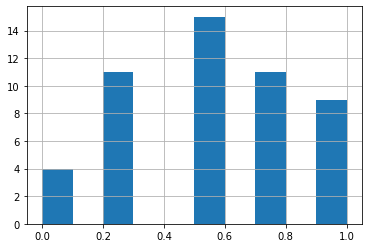

In [98]:
ait_values['ait_39. What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?'].hist()

In [99]:
ait_values.to_csv('eng_ait_values.csv', index = False)

In [100]:
for column in survey.columns:
        if(str.startswith(column, 'ainh')):
            print(f'\'{column}\',')

'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [The speed of the car]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Changing Lanes]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Signalling ]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to pe

In [101]:
ainh_values = survey[['ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [The speed of the car]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Changing Lanes]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Signalling ]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Driving in hazardous weather conditions]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Braking]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Maintaining a certain distance from the cars around you]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Parking]',
'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Driving at night]',
'ainh_47. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: NON-HIGHWAY ROADS ',
'ainh_48. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS, you expect the car to change lanes:',
'ainh_49. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:',
'ainh_50. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: NON-HIGHWAY ROADS ',
'ainh_51. If you are traveling in a self-driving car, how often would you want the car to brake when driving on: NON-HIGHWAY ROADS ']]

In [102]:
ainh_key = {'Distrust':0,
            'Somewhat Distrust':.25,
            'Neutral':.5,
            'Somewhat Trust':.75,
            'Trust':1
}
ainh_values.iloc[:,0].replace(ainh_key, inplace = True)
ainh_values.iloc[:,1].replace(ainh_key, inplace = True)
ainh_values.iloc[:,2].replace(ainh_key, inplace = True)
ainh_values.iloc[:,3].replace(ainh_key, inplace = True)
ainh_values.iloc[:,4].replace(ainh_key, inplace = True)
ainh_values.iloc[:,5].replace(ainh_key, inplace = True)
ainh_values.iloc[:,6].replace(ainh_key, inplace = True)
ainh_values.iloc[:,7].replace(ainh_key, inplace = True)

In [103]:
ainh_key = {'I prefer the self driving car to maintain a speed of 5 mph or more UNDER the speed limit.':0,
            'I prefer the self driving car to maintain a speed within plus or minus 5 mph of the speed limit.':.5,
            'I prefer the self driving car to maintain a speed of 5 mph or more OVER the speed limit.': 1
}
ainh_values.iloc[:,8].replace(ainh_key, inplace = True)

In [104]:
ainh_key = {'Only if absolutely necessary':0,
            'Occasionally if it needs to overtake an extremely slow vehicle.':.5,
            'Frequently, I expect the car to keep me in the fastest possible lane at all times.': 1
}
ainh_values.iloc[:,9].replace(ainh_key, inplace = True)

In [105]:
ainh_key = {'Slowly: The car may take a while to get up to speed.The car would avoid having to make a short stop.':0,
            'Smooth: as long as the ride is smooth and safe, the car can accelerate/decelerate quickly.':.5,
            'Fast: the car should get up to speed rapidly and get to the destination as fast as possible.': 1
}
ainh_values.iloc[:,10].replace(ainh_key, inplace = True)

In [106]:
ainh_key = {'Rarely: only if the car absolutely has to.':0,
            'Sometimes: I want to get to my destination quickly, but I want the ride to be smooth and steady.':.5,
            'Always: I want to be on the quickest path to my destination.': 1
}
ainh_values.iloc[:,11].replace(ainh_key, inplace = True)

In [107]:
ainh_key = {'Frequently: If I see brake lights, something in the road, or any perceived risk, I expect the car to react and that may mean braking a lot.':0,
            'Sometimes: The car should brake when necessary. The car should keep the right distance from the cars around it so that the ride is smooth.':.5,
            'Rarely: The car should brake only when it absolutely has to like if there is traffic or an emergency vehicle. If the car can avoid braking by changing lanes I expect it to change lanes.': 1
}
ainh_values.iloc[:,12].replace(ainh_key, inplace = True)

In [108]:
ainh_values

,"ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [The speed of the car]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Changing Lanes]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Signalling ]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Driving in hazardous weather conditions]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Braking]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Maintaining a certain distance from the cars around you]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Parking]","ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS [Driving at night]","ainh_47. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: NON-HIGHWAY ROADS","ainh_48. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS, you expect the car to change lanes:","ainh_49. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:","ainh_50. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: NON-HIGHWAY ROADS","ainh_51. If you are traveling in a self-driving car, how often would you want the car to brake when driving on: NON-HIGHWAY ROADS"
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.5,0.0,0.5
1,0.00,0.25,0.50,0.00,0.75,0.75,0.25,0.00,0.5,0.0,0.5,0.5,0.0
2,0.50,0.25,0.50,0.25,0.25,0.50,0.25,0.50,0.0,0.0,0.0,0.0,0.0
3,1.00,1.00,1.00,1.00,1.00,0.75,0.50,0.50,0.5,0.0,0.0,0.5,0.5
4,1.00,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.5
5,0.75,0.75,0.75,0.25,0.75,0.75,0.75,1.00,0.5,0.5,0.5,0.5,0.5
6,0.25,0.25,1.00,0.25,1.00,0.75,0.75,0.75,0.5,0.5,0.5,0.5,0.5
7,0.75,1.00,0.50,0.50,0.75,1.00,0.75,0.50,0.5,0.5,0.5,0.5,0.0
8,0.50,0.75,1.00,0.50,0.75,1.00,0.50,0.75,0.5,0.5,0.5,0.5,0.5
9,0.75,0.50,1.00,0.25,1.00,0.75,0.75,1.00,0.0,0.5,0.5,0.5,0.5


In [109]:
for column in survey.columns:
        if(str.startswith(column, 'aih')):
            print(f'\'{column}\',')

'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [The speed of the car]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Changing Lanes]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Signalling ]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomous

In [110]:
aih_values = survey[['aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [The speed of the car]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Changing Lanes]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Signalling ]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Driving in hazardous weather conditions]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Braking]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Maintaining a certain distance from the cars around you]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Parking]',
'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Driving at night]',
'aih_53. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: HIGHWAY ROADS ',
'aih_54. If you are traveling in a self-driving car, on HIGHWAY ROADS, you expect the car to change lanes:',
'aih_55. If you are traveling in a self-driving car, on HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:',
'aih_56. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: HIGHWAY ROADS ',
'aih_57. If you are traveling in a self-driving car, how often would you want the car to brake when driving on: HIGHWAY ROADS ']]

In [111]:
aih_key = {'Distrust':0,
            'Somewhat Distrust':.25,
            'Neutral':.5,
            'Somewhat Trust':.75,
            'Trust':1
}
aih_values.iloc[:,0].replace(aih_key, inplace = True)
aih_values.iloc[:,1].replace(aih_key, inplace = True)
aih_values.iloc[:,2].replace(aih_key, inplace = True)
aih_values.iloc[:,3].replace(aih_key, inplace = True)
aih_values.iloc[:,4].replace(aih_key, inplace = True)
aih_values.iloc[:,5].replace(aih_key, inplace = True)
aih_values.iloc[:,6].replace(aih_key, inplace = True)
aih_values.iloc[:,7].replace(aih_key, inplace = True)

In [112]:
aih_key = {'I prefer the self driving car to maintain a speed of 5 mph or more UNDER the speed limit.':0,
            'I prefer the self driving car to maintain a speed within plus or minus 5 mph of the speed limit.':.5,
            'I prefer the self driving car to maintain a speed of 5 mph or more OVER the speed limit.': 1
}
aih_values.iloc[:,8].replace(aih_key, inplace = True)

In [113]:
aih_key = {'Only if absolutely necessary':0,
            'Occasionally if it needs to overtake an extremely slow vehicle.':.5,
            'Frequently, I expect the car to keep me in the fastest possible lane at all times.': 1
}
aih_values.iloc[:,9].replace(aih_key, inplace = True)

In [114]:
aih_key = {'Slowly: The car may take a while to get up to speed.The car would avoid having to make a short stop.':0,
            'Smooth: as long as the ride is smooth and safe, the car can accelerate/decelerate quickly.':.5,
            'Fast: the car should get up to speed rapidly and get to the destination as fast as possible.': 1
}
aih_values.iloc[:,10].replace(aih_key, inplace = True)

In [115]:
aih_key = {'Rarely: only if the car absolutely has to.':0,
            'Sometimes: I want to get to my destination quickly, but I want the ride to be smooth and steady.':.5,
            'Always: I want to be on the quickest path to my destination.': 1
}
aih_values.iloc[:,11].replace(aih_key, inplace = True)

In [116]:
aih_key = {'Frequently: If I see brake lights, something in the road, or any perceived risk, I expect the car to react and that may mean braking a lot.':0,
            'Smooth: as long as the ride is smooth and safe, the car can accelerate/decelerate quickly.':.5,
            'Fast: the car should get up to speed rapidly and get to the destination as fast as possible.': 1
}
aih_values.iloc[:,12].replace(aih_key, inplace = True)

In [117]:
dbh_values = dbh_values.drop('dbh_26. When driving on a HIGHWAY with more than 2 lanes, what lane is your preference? ', axis = 1)

In [118]:
dbg_values = dbg_values.drop(['dbg_30. Which type of parking do you find the most challenging? ',
                 'dbg_31. What less than perfect weather situation do you drive in most often? ',
                 ]
, axis = 1)

In [119]:
dbg_values

,"dbg_27. You need to change your lane to get to the highway, but the spot you were looking to move to is not large enough. What do you do?",dbg_28. What best describes your driving behavior when making a turn?,dbg_29. What best describes your driving behavior when driving on a winding road?,"dbg_32. When driving in that less than perfect weather condition, what happens to your speed?","dbg_33. When driving in that less than perfect weather condition, what happens to your signaling behavior?",dbg_34. How would you describe your lane changing behavior when driving in that less than perfect weather condition?,"dbg_35. When driving in that less than perfect weather condition, what distance do you prefer to keep from the car in front of you?",dbg_36. Which best describes your driving behavior most of the time in terms of speed while driving at night?,dbg_37. Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night:,dbg_38. Which best describes your lane changing behavior when driving at night?
0,0.5,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
1,0.5,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.5,1.0,0.25,0.5
3,0.5,0.25,0.5,0.5,0.5,0.0,0.0,0.0,0.00,0.0
4,0.0,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.0
5,0.5,0.25,0.5,0.0,0.0,0.0,1.0,1.0,1.00,0.0
6,0.5,0.25,0.5,1.0,1.0,0.5,0.5,0.5,0.00,0.0
7,0.5,0.00,0.0,0.5,0.5,0.5,0.5,0.0,0.25,0.0
8,0.5,0.75,0.5,0.5,0.5,0.5,0.5,0.5,1.00,0.5
9,0.5,0.00,0.0,0.0,0.0,0.5,0.5,0.0,0.00,0.0


In [120]:
dbg_cc_cols = []
for column in dbg_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    dbg_cc_cols.append(col_name)
dbg_cc = dbg_values[dbg_cc_cols]

In [121]:
dbg_cc

,"dbg_27. You need to change your lane to get to the highway, but the spot you were looking to move to is not large enough. What do you do?",dbg_28. What best describes your driving behavior when making a turn?,dbg_29. What best describes your driving behavior when driving on a winding road?,"dbg_32. When driving in that less than perfect weather condition, what happens to your speed?","dbg_33. When driving in that less than perfect weather condition, what happens to your signaling behavior?",dbg_34. How would you describe your lane changing behavior when driving in that less than perfect weather condition?,"dbg_35. When driving in that less than perfect weather condition, what distance do you prefer to keep from the car in front of you?",dbg_36. Which best describes your driving behavior most of the time in terms of speed while driving at night?,dbg_37. Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night:,dbg_38. Which best describes your lane changing behavior when driving at night?
0,0.5,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
1,0.5,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.5,1.0,0.25,0.5
3,0.5,0.25,0.5,0.5,0.5,0.0,0.0,0.0,0.00,0.0
4,0.0,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.0
5,0.5,0.25,0.5,0.0,0.0,0.0,1.0,1.0,1.00,0.0
6,0.5,0.25,0.5,1.0,1.0,0.5,0.5,0.5,0.00,0.0
7,0.5,0.00,0.0,0.5,0.5,0.5,0.5,0.0,0.25,0.0
8,0.5,0.75,0.5,0.5,0.5,0.5,0.5,0.5,1.00,0.5
9,0.5,0.00,0.0,0.0,0.0,0.5,0.5,0.0,0.00,0.0


In [122]:
demographic_cols = []
for column in survey.columns:
        if(str.startswith(column, 'demographic')):
            demographic_cols.append(column)
demo_data = survey[demographic_cols]

In [123]:
ait_cc_cols = []
for column in ait_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    ait_cc_cols.append(col_name)
ait_cc = ait_values[ait_cc_cols]

In [124]:
ait_cc

,ait_39. What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?,ait_40. What is your trust level to utilize a Self-Driving car when this technology becomes available?,ait_41. What is your trust level that self-driving cars will keep your own safety as it's primary objective?,ait_42. What is your trust level that self-driving cars will be able to navigate in construction zones that include temporary detours that would ordinarily go against the flow of traffic?,ait_43. What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?,ait_44. What is your trust level that self-driving cars will successfully get you to the EXACT destination you requested?,ait_45. What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle.
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.25,0.00,0.00,0.00,0.00,0.00,0.25
2,0.25,0.25,0.50,0.25,0.25,0.50,0.25
3,1.00,0.75,0.75,0.25,0.50,0.50,0.50
4,0.25,0.25,0.25,0.25,0.25,0.25,0.25
5,0.75,0.75,0.25,0.25,0.25,0.75,0.75
6,0.50,0.25,0.25,0.25,0.75,1.00,0.75
7,0.50,0.75,0.50,0.25,0.75,1.00,1.00
8,0.50,0.75,0.50,0.75,0.50,0.75,0.50
9,0.75,0.75,0.75,0.75,0.75,0.75,0.75


In [125]:
ainht_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '46'):
        ainht_cc_cols.append(col_name)
ainht_cc = ainh_values[ainht_cc_cols]

In [126]:
aiht_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num == '52'):
        aiht_cc_cols.append(col_name)
aiht_cc = aih_values[aiht_cc_cols]

In [127]:
ainh_cc_cols = []
for column in ainh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '46'):
        ainh_cc_cols.append(col_name)
print(ainh_cc_cols)

['ainh_47. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: NON-HIGHWAY ROADS ', 'ainh_48. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS, you expect the car to change lanes:', 'ainh_49. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:', 'ainh_50. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: NON-HIGHWAY ROADS ', 'ainh_51. If you are traveling in a self-driving car, how often would you want the car to brake when driving on: NON-HIGHWAY ROADS ']


In [128]:
ainh_cc = ainh_values[ainh_cc_cols]

In [129]:
aih_cc_cols = []
for column in aih_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if(num != '52'):
        aih_cc_cols.append(col_name)
print(aih_cc_cols)

['aih_53. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: HIGHWAY ROADS ', 'aih_54. If you are traveling in a self-driving car, on HIGHWAY ROADS, you expect the car to change lanes:', 'aih_55. If you are traveling in a self-driving car, on HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:', 'aih_56. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: HIGHWAY ROADS ', 'aih_57. If you are traveling in a self-driving car, how often would you want the car to brake when driving on: HIGHWAY ROADS ']


In [130]:
aih_cc = aih_values[aih_cc_cols]

In [131]:
dbnh_cc_cols = []
for column in dbnh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '10') or (num == '12') or (num == '14') or (num == '15') or (num == '17')):
        dbnh_cc_cols.append(col_name)
print(dbnh_cc_cols)

['dbnh_10. Which best describes your driving behavior most of the time in terms of speed while driving on: NON-HIGHWAY ROADS ', 'dbnh_12. Which best describes your lane changing behavior when driving on: NON-HIGHWAY ROADS', 'dbnh_14. How would you describe the way you accelerate and decelerate while driving on: NON-HIGHWAY ROADS', 'dbnh_15. How often do you pass other vehicles when driving on: NON-HIGHWAY ROADS', 'dbnh_17. Which best describes your braking behavior when driving on: NON-HIGHWAY ROADS']


In [132]:
dbnh_cc = dbnh_values[dbnh_cc_cols]

In [133]:
dbh_cc_cols = []
for column in dbh_values.columns:
    col_name = str(column)
    num = re.findall(r'\d+', str(col_name))[0]
    if((num == '18') or (num == '20') or (num == '22') or (num == '23') or (num == '25')):
        dbh_cc_cols.append(col_name)
print(dbh_cc_cols)

['dbh_18. Which best describes your driving behavior most of the time in terms of speed while driving on: THE HIGHWAY', 'dbh_20. Which best describes your lane changing behavior when driving on: THE HIGHWAY ', 'dbh_22. How would you describe the way you accelerate and decelerate while driving on: THE HIGHWAY', 'dbh_23. How often do you pass other vehicles when driving on: THE HIGHWAY', 'dbh_25. Which best describes your braking behavior when driving on: THE HIGHWAY']


In [134]:
dbh_cc = dbh_values[dbh_cc_cols]

In [135]:
dbg_score_matrix = pd.DataFrame()
for index in range(dbg_cc.shape[0]):
    user = []
    for column in range(dbg_cc.shape[1]):
        dbg_avg = (dbg_cc.iloc[index][column])
        user.append(dbg_avg)
    dbg_user_avg = sum(user)/len(user)
    dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/1087667569.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dbg_score_matrix = dbg_score_matrix.append({'dbg':dbg_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/1087667569.py:8: FutureWar

In [136]:
dba_score_matrix = pd.DataFrame()
for index in range(dbh_cc.shape[0]):
    user = []
    for column in range(dbh_cc.shape[1]):
        dba_avg = (dbnh_cc.iloc[index][column]+dbh_cc.iloc[index][column])/2
        user.append(dba_avg)
    dba_user_avg = sum(user)/len(user)
    dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/3018927409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dba_score_matrix = dba_score_matrix.append({'dba':dba_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/3018927409.py:8: FutureWar

In [137]:
sdcc_score_matrix = pd.DataFrame()
for index in range(aih_cc.shape[0]):
    user = []
    for column in range(aih_cc.shape[1]):
        sdcc_avg = (ainh_cc.iloc[index][column]+aih_cc.iloc[index][column])/2
        user.append(sdcc_avg)
    sdcc_user_avg = sum(user)/len(user)
    sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2996390202.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdcc_score_matrix = sdcc_score_matrix.append({'sdca':sdcc_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2996390202.py:

In [138]:
ait_score_matrix = pd.DataFrame()
for index in range(ait_cc.shape[0]):
    user = []
    for column in range(ait_cc.shape[1]):
        ait_avg = ait_cc.iloc[index][column]
        user.append(ait_avg)
    ait_user_avg = sum(user)/len(user)
    ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2831680134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ait_score_matrix = ait_score_matrix.append({'ait':ait_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/2831680134.py:8: FutureWar

In [139]:
aidt_score_matrix = pd.DataFrame()
for index in range(aiht_cc.shape[0]):
    user = []
    for column in range(aiht_cc.shape[1]):
        aidt_avg = (ainht_cc.iloc[index][column]+aiht_cc.iloc[index][column])/2
        user.append(aidt_avg)
    aidt_user_avg = sum(user)/len(user)
    aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)

/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/414847197.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aidt_score_matrix = aidt_score_matrix.append({'aidt':aidt_user_avg}, ignore_index = True)
/var/folders/9j/n5qfv3v538b22b54c12c6pp40000gn/T/ipykernel_35664/414847197.py:8: F

In [145]:
inp = dbnh_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=dbnh_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(len(max_key))
print(max_value)


['dbnh_10. Which best describes your driving behavior most of the time in terms of speed while driving on: NON-HIGHWAY ROADS ', 'dbnh_12. Which best describes your lane changing behavior when driving on: NON-HIGHWAY ROADS', 'dbnh_14. How would you describe the way you accelerate and decelerate while driving on: NON-HIGHWAY ROADS']
3
0.43245693563009974


In [148]:
dbnh_cc_eng = dbnh_cc.to_csv('eng_dbnh_cc.csv', index = False)

In [151]:
dbh_cc.columns

Index(['dbh_18. Which best describes your driving behavior most of the time in terms of speed while driving on: THE HIGHWAY',
       'dbh_20. Which best describes your lane changing behavior when driving on: THE HIGHWAY ',
       'dbh_22. How would you describe the way you accelerate and decelerate while driving on: THE HIGHWAY',
       'dbh_23. How often do you pass other vehicles when driving on: THE HIGHWAY',
       'dbh_25. Which best describes your braking behavior when driving on: THE HIGHWAY'],
      dtype='object')

In [141]:
inp = dbh_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=dbh_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

['dbh_20. Which best describes your lane changing behavior when driving on: THE HIGHWAY ', 'dbh_23. How often do you pass other vehicles when driving on: THE HIGHWAY']
0.6207407407407408


In [143]:
print(pg.cronbach_alpha(data=dbnh_cc, ci = .95))
print(pg.cronbach_alpha(data=dbh_cc, ci = .95))
print(pg.cronbach_alpha(data=ainht_cc, ci =.95))

(0.30637429398642546, array([-0.052,  0.569]))
(0.487214498510427, array([0.222, 0.682]))
(0.8810095431385929, array([0.824, 0.925]))


In [101]:
inp = ainht_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=ainht_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

['ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [The speed of the car]', 'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Changing Lanes]', 'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: NON-HIGHWAY ROADS  [Signalling ]', 'ainh_46. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to p

In [102]:
inp = aiht_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=aiht_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

['aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [The speed of the car]', 'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Changing Lanes]', 'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomously? Please rank your trust level when it comes to the following driving tasks being performed by a self-driving car when driving on: HIGHWAY ROADS  [Signalling ]', 'aih_52. If you were in a self driving car, what tasks do you feel comfortable handing over to the car to perform autonomou

In [103]:
inp = ait_cc.columns
output = sum([list(map(list, combinations(inp, i))) for i in range(len(inp) + 1)], [])
max_value = 0
for key in output:
    if(len(key)>1):
        value = pg.cronbach_alpha(data=ait_cc[key])[0]
        if(value > max_value):
            max_key = key
            max_value = value
print(max_key)
print(max_value)

['ait_39. What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?', 'ait_40. What is your trust level to utilize a Self-Driving car when this technology becomes available?', "ait_41. What is your trust level that self-driving cars will keep your own safety as it's primary objective?", 'ait_42. What is your trust level that self-driving cars will be able to navigate in construction zones that include temporary detours that would ordinarily go against the flow of traffic?', 'ait_43. What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?', 'ait_44. What is your trust level that self-driving cars will successfully get you to the EXACT destination you requested?', 'ait_45. What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. ']
0.8793713149665641


In [104]:
print('DBA NH:',pg.cronbach_alpha(data=dbnh_cc, ci = .80))
print('DBA HW:',pg.cronbach_alpha(data=dbh_cc, ci = .80))
print('AI NW:',pg.cronbach_alpha(data=ainh_cc, ci =.80))
print('AI HW:',pg.cronbach_alpha(data=aih_cc, ci =.80))
print('AIDMT NW:',pg.cronbach_alpha(data=aiht_cc, ci =.80))
print('AIDMT HW:',pg.cronbach_alpha(data=ainht_cc, ci =.80))
print('AIT:',pg.cronbach_alpha(data=ait_cc, ci =.80))

DBA NH: (0.30637429398642557, array([0.089, 0.491]))
DBA HW: (0.487214498510427, array([0.327, 0.624]))
AI NW: (0.7008793494704992, array([0.607, 0.781]))
AI HW: (0.78295661407767, array([0.715, 0.841]))
AIDMT NW: (0.9049907343843623, array([0.877, 0.93 ]))
AIDMT HW: (0.8810095431385929, array([0.846, 0.912]))
AIT: (0.8793713149665641, array([0.843, 0.911]))


In [105]:
pg.cronbach_alpha(data=dbg_cc,ci=.95)

(0.5345709092315428, array([0.316, 0.705]))

In [106]:
pg.cronbach_alpha(data=dbg_cc,ci=.80)

(0.5345709092315428, array([0.401, 0.654]))

aidt_score_matrix

In [107]:
scores = pd.concat([demo_data, dba_score_matrix, sdcc_score_matrix, ait_score_matrix, aidt_score_matrix, dbg_score_matrix], axis = 1)

In [174]:
scores.to_csv('us_scores.csv', index = False)